# Домашнее задание 1

Это домашнее задание по материалам 1-4 недели семестра (1-4 лекции). Дедлайн по отправке - 23:59 14 апреля.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МГУ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МГУ_1__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Суммарный балл за задание равен 240. Чтобы получить максимальный оценку за задание, нужно набрать 150 баллов. Баллы сверх 150 позволяют набрать оценку выше максимума.

- Часть задач помечена $\triangle$. Они также входят в максимальный балл за задание, но мы считаем, что достаточно выполнить задания без $\triangle$, чтобы вникнуть в основные вещи, происходящие в соотвествующей части задания.

Желаем успехов!

### Часть 1. Дихотомия и Золотое сечение

__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что 

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 40 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (20 баллов)__ Докажите корректность для нахождения минимума унимодальной функции. Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Т.е. необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

In [1]:
#ваше решение (Markdown)

Выходом данного алгоритма будет точка 
$$x^{(k)} = \frac{a^{(k)} + b^{(k)}}{2}$$

Видно, что на каждой итерации длина отрезка поиска сокращается вдвое. В обозначениях алгоритма на $k+1$-ой итерции мы будем искать минимум функции на одном из отрезков $[a, c], [d, e], [c, b]$, где $c = \frac{1}{2}(a + b), d = \frac{1}{2}(a + c) = \frac{1}{2}(a + \frac{1}{2}(a + b)) = \frac{3}{4}a + \frac{1}{4}b$ и $e = \frac{1}{2}(b + c) = \frac{1}{2}(b + \frac{1}{2}(a + b)) = \frac{1}{4}a + \frac{3}{4}b$

Имеем:
$$
|c - a| = \frac{1}{2}(a + b) - a = \frac{1}{2}(b - a) \\
|b - c| = b - \frac{1}{2}(a + b) = \frac{1}{2}(b - a) \\
|e - d| = \frac{1}{4}a + \frac{3}{4}b - \frac{3}{4}a + \frac{1}{4}b = \frac{1}{2}(b - a)
$$
То есть $|b^{(k+1)} - a^{(k+1)}| = \frac{1}{2} |b^{(k)} - a^{(k)}| = \frac{1}{4} |b^{(k-1)} - a^{(k-1)}| = ... = \frac{1}{2^{k+1}} |b^{(0)} - a^{(0)}|$

Поскольку функция непрерывна на $[a, b]$, по теореме Вейерштрасса она достигает своего минимума на этом интервале. В силу реализации алгортма на каждой итерацией мы выбираем подынтервал, содержащий точку минимума. Длина интервала уменьшается экспоненциально, стремясь к нулю когда количество итераций стремится к бесконечности:
$$ 
\lim_{k \to \infty} \left(\frac{b - a}{2^k}\right) = 0
$$

Так как интервал сужается и всегда содержит минимум, последовательности точек $a^{(k)}$ и $b^{(k)}$ сходятся к точке минимума функции. По сути, мы получаем последовательность вложенных замкнутых интервалов, которые формируют стягивающуюся последовательность. По принципу непрерывности (или в силу свойства полноты вещественных чисел), последовательность $x^{(k)}$ сходится к единственной точке, которая является точкой минимума функции на этом интервале.

Оценим сложность алгоритма. Чтобы $|x^{(k)} - x^*| \leq \varepsilon$, необходимо и достаточно $|b^{(k)} - a^{(k)}| \leq \varepsilon <=> \frac{b - a}{2^k} \leq \varepsilon <=> k \geq \log(b-a) - \log \varepsilon$ И приэтом при достижении данной точности $\varepsilon$, алгоритм остановится. то есть $k \leq \log(b-a) - \log \varepsilon$

__б). (5 баллов)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком то отрезке. Где у нее находится $c^*$?

In [ ]:
#ваше решение (Markdown)

Рассмотрим функцию $f(x) = x^2 − 3x + x \ln x$

$f'(x) = 2x - 3 + \ln x + 1 = 2x + \ln x -2$

$2x + \ln x -2 = 0 <=> \ln x = 2x -2 <=> x = e^{2x -2}$, видно, что $x=1$

$f'(x) < 0, x \in (0, 1) \Rightarrow f(x)$ убывает на интервале (0, 1)

$f'(x) > 0, x \in (1, 2) \Rightarrow f(x)$ возрастает на интервале (1, 2)

Приэтом $f''(x) = 2 + \frac{1}{x} > 0, x \in (0, +\inf) $

Таким образом, получаем, что данная фукция является унимодальной на интервале (0, 2)

__в). (15 баллов)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$, 

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта а). Сделайте вывод.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [8]:
#ваше решение (Code и Markdown)

In [1]:
def binpoisk(f, a, b, eps, argmin_gt):
    c = (a + b) / 2
    count_function_call = 0
    history = []
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
            count_function_call += 2
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
            count_function_call += 2
        history.append([count_function_call, abs(c - argmin_gt)])
    return c, history

In [2]:
import math

def f(x):
    return x**2 - 3*x + x*math.log(x)

In [3]:
import matplotlib.pyplot as plt

In [4]:
def plot(x_axis, y_axis, xlabel, ylabel, labels, scale="linear"):
    #plt.figure(figsize=(10,8)) 

    # рисуем графики
    for x, y, label in zip(x_axis, y_axis, labels):
        plt.plot(x, y, label=label)

    plt.grid(True)
    plt.legend(fontsize=10)

    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.yscale(scale)

    plt.show()

In [8]:
def theory_error(k, a, b):
    return (0.5)**k*abs(b - a)

def theory_call(k, a, b):
    return theory_error(k//4, a, b)

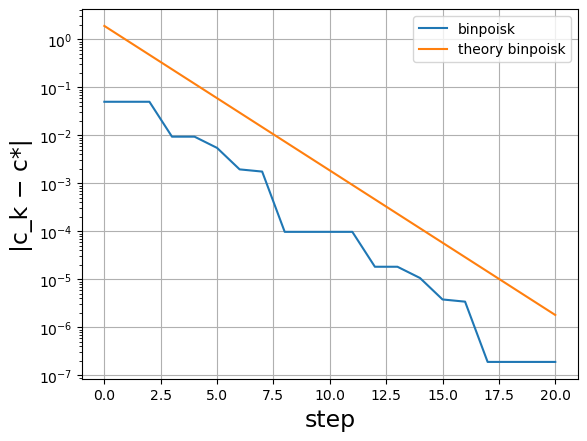

In [9]:
c, history = binpoisk(f, 0.1, 2, eps=1e-6, argmin_gt=1)
x_axis = [list(range(len(history))), list(range(len(history)))]
y_axis = [[x[-1] for x in history], [theory_error(i, 0.1, 2) for i in range(len(history))]]
labels = ['binpoisk', 'theory binpoisk']
plot(x_axis, y_axis, 'step', '|c_k − c*|', labels, scale='log')

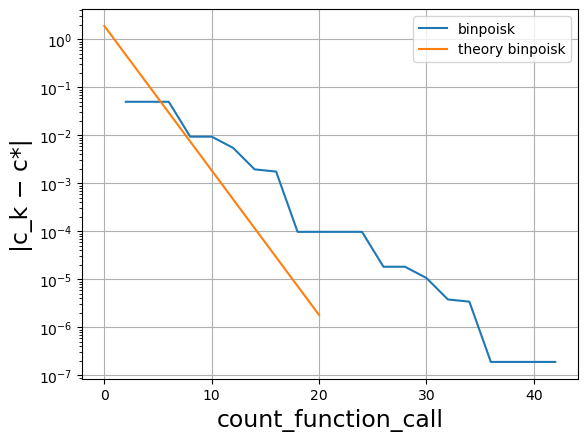

In [10]:
x_axis = [[x[0] for x in history], list(range(len(history)))]
y_axis = [[x[-1] for x in history], [theory_error(i, 0.1, 2) for i in range(len(history))]]
labels = ['binpoisk', 'theory binpoisk']
plot(x_axis, y_axis, 'count_function_call', '|c_k − c*|', labels, scale='log')

__Задача 2. (всего 20 баллов)__ Рассмотрим метод золотого сечения:

```python
def golden_ration(f, a, b, eps):
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (10 баллов)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции. Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Лучше или хуже данный алгоритм, чем метод дихотомии?

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

In [2]:
#ваше решение (Markdown)

Аналолгино с методом дихотомии в данном алгоритме интервал поиска решения уменьшается в $1/\tau$ раз ($\tau = \frac{1 + \sqrt{5}}{2}$)
Откуда следует, что для достижения $\varepsilon$ точности необходимо и достаточно сделать $K = \frac{\log(b-a) - \log \varepsilon}{\log \tau}$ итераций

__б). (10 баллов)__ Реализуйте метод золотого сечения. Добавьте результаты золотого сечения (теоретические и практические) на графики из пункта 1.в). Сделайте вывод.

In [11]:
#ваше решение (Code и Markdown)

In [12]:
from math import sqrt

In [13]:
def golden_ration(f, a, b, eps, argmin_gt):
    tau = (1 + sqrt(5)) / 2
    count_function_call = 0
    history = []
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
        count_function_call += 2
        history.append([count_function_call, abs((a + b) / 2 - argmin_gt)])
    return (a + b) / 2, history

In [15]:
def theory_err_gs(k, a, b):
    tau = (1 + sqrt(5)) / 2
    return (1/tau)**k*abs(b-a)

def theory_call_gs(k, a, b):
    return theory_err_gs(k//2, a, b)

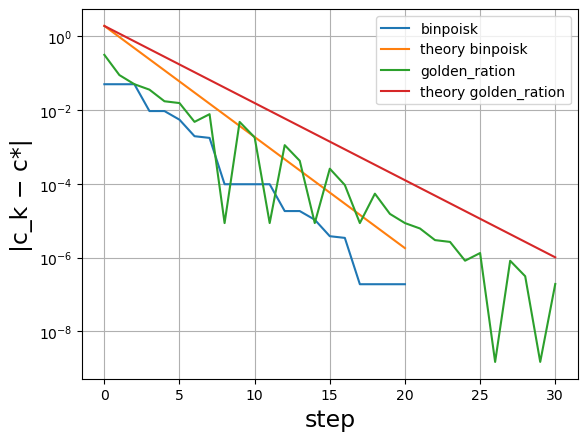

In [16]:
c, history_golden = golden_ration(f, 0.1, 2, eps=1e-6, argmin_gt=1)
x_axis = [list(range(len(history))), list(range(len(history))), list(range(len(history_golden))), list(range(len(history_golden)))]
y_axis = [[x[-1] for x in history], [theory_error(i, 0.1, 2) for i in range(len(history))],
          [x[-1] for x in history_golden], [theory_err_gs(i, 0.1, 2) for i in range(len(history_golden))]]
labels = ['binpoisk', 'theory binpoisk', 'golden_ration', 'theory golden_ration']

plot(x_axis, y_axis, 'step', '|c_k − c*|', labels, scale='log')

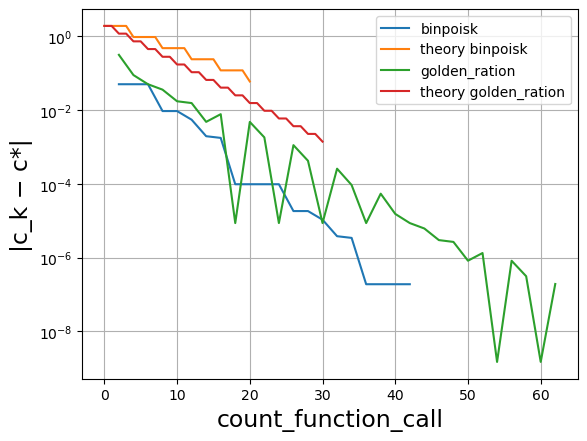

In [18]:
x_axis = [[x[0] for x in history], list(range(len(history))), [x[0] for x in history_golden], list(range(len(history_golden)))]
y_axis = [[x[-1] for x in history], [theory_call(i, 0.1, 2) for i in range(len(history))],
          [x[-1] for x in history_golden], [theory_call_gs(i, 0.1, 2) for i in range(len(history_golden))]]
labels = ['binpoisk', 'theory binpoisk', 'golden_ration', 'theory golden_ration']
plot(x_axis, y_axis, 'count_function_call', '|c_k − c*|', labels, scale='log')

Видно, что оба алгоритма сходятся. Но приэтом бинпоиску нужно совершить намного меньше итераций и вызовов функций. С другой стороны, в моменте у золотого сечения были случаи когда решение было намного ближе чем у бинпоиска (что к сожалению ничего не значит, так как на практике нам неизвестны точные значения)

### Часть 2. Решаем задачу безусловной оптимизации

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
где $\ell$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$, $\lambda > 0$ - параметр регуляризации.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Полученная задача называется задачей логистической регрессии. 

__Задача 1. (всего 25 баллов)__ Проведем подготовительную работу. 

__а). (15 баллов)__ Докажите, что градиент и гессиан для функции $f$ могут быть записаны в следующем виде:
$$
\nabla f(w) = \frac{1}{n} \sum_{i=1}^n \frac{-y_i}{1 + \exp(y_i w^Tx_i)}x_i + \lambda w,
\quad
\nabla^2 f(w) = \frac{1}{n} \sum_{i=1}^n \frac{\exp(y_i w^Tx_i)}{(1 + \exp(y_i w^Tx_i))^2} x_i x_i^T + \lambda I.
$$

Докажите, что $f$ является $\mu$-сильно выпуклой и имеет $L$-Липшицев градиент, при этом $\mu = \lambda$, а $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$. 

In [5]:
#ваше решение Markdown

Найдем градиент нашей функции $f(w) = \frac{1}{n} \sum \limits_{i=1}^n \log(1 + e^{-M_i}) + \frac{\lambda}{2} \|w\|^2 $, где $M_i = y_i\langle x_i, w\rangle$
$$
df = \frac{1}{n} \sum \limits_{i=1}^n d\log(1 + e^{-M_i}) + \frac{\lambda}{2} d\|w\|^2 = \frac{1}{n} \sum \limits_{i=1}^n \frac{1}{1 + e^{-M_i}} \: d e^{-y_i\langle x_i, w\rangle} \; + 
$$

$$
+ \frac{\lambda}{2} d\langle w, w\rangle = \frac{1}{n} \sum \limits_{i=1}^n \frac{e^{-M_i}}{1 + e^{-M_i}} \: d(-y_i\langle x_i, w\rangle) + \frac{\lambda}{2} \; 2 \langle w, dw\rangle  =
$$

$$
= \frac{1}{n} \sum \limits_{i=1}^n \frac{-y_i}{1 + e^{M_i}} \:\langle x_i, dw\rangle) +\lambda\langle w, dw\rangle = \langle -\frac{1}{n} \sum \limits_{i=1}^n \frac{y_i}{1 + e^{M_i}} x_i + \lambda w, dw\rangle
$$

Таким образом, получим, что градиент нашего функционала равен:
$$
\nabla f = -\frac{1}{n} \sum \limits_{i=1}^n \frac{y_i}{1 + e^{y_i\langle x_i, w\rangle}} \: x_i + \lambda w
$$


Найдем теперь гессиан:
$$
d^2 f(w) = d \langle -\frac{1}{n} \sum \limits_{i=1}^n \frac{y_i}{1 + e^{M_i}} x_i + \lambda w, dw\rangle = \langle -\frac{1}{n} \sum \limits_{i=1}^n d (\frac{y_i}{1 + e^{M_i}} x_i) + \lambda dw, dw_1\rangle = \langle \frac{1}{n} \sum \limits_{i=1}^n \frac{y_i}{(1 + e^{M_i})^2} x_i d e^{M_i} + \lambda dw, dw_1\rangle = 
$$

$$
= \langle \frac{1}{n} \sum \limits_{i=1}^n \frac{y_i e^{M_i}}{(1 + e^{M_i})^2} x_i d ( y_i\langle x_i, w\rangle) + \lambda dw, dw_1\rangle = \langle \frac{1}{n} \sum \limits_{i=1}^n \frac{y_i^2 e^{M_i}}{(1 + e^{M_i})^2} x_i x_i^T dw + \lambda dw, dw_1\rangle = \langle (\frac{1}{n} \sum \limits_{i=1}^n \frac{e^{M_i}}{(1 + e^{M_i})^2} x_i x_i^T + \lambda I) dw, dw_1\rangle
$$

Таким образом, получим, что гессиан нашего функционала равен:
$$
\nabla^2 f = \frac{1}{n} \sum \limits_{i=1}^n \frac{e^{y_i\langle x_i, w\rangle}}{(1 + e^{y_i\langle x_i, w\rangle})^2} \: x_i x_i^T  + \lambda I
$$

Так как матрицы $xx^T$ и $I$ являются неотрицательно определёнными, а матрица $I$ положительно определённой,то их сумма так же будет положительно определена. Приэтом минимальное собственное значение будет равно $\lambda$. То есть функция $f(w)$ будет $\mu$-сильно выпуклой. И $\mu$ не превосходит минимального собственного значения гессиана. Отсюда следует, что $\mu = \lambda$.

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [19]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [20]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приемами из машинного обучения), но это никак дополнительно не оценивается.

In [21]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1., -1., -1., ...,  1., -1.,  1.]))

__б). (10 баллов)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$. Задайте $\lambda$ так, чтобы $\lambda \approx L / 1000$.  Реализуйте в коде подсчет значения, градиента и гессиана для нашей целевой функции ($X$, $y$, $\lambda$ лучше подавать в качестве параметра, чтобы была возможность их менять, а не только подставлять фиксированные $X_{train}$, $y_{train}$). Можно использовать как библиотеку ``numpy``, так и библиотеки ``autograd``, ``pytorch``, ``jax``.

In [24]:
#ваше решение (Code и Markdown)

In [47]:
import numpy as np
import autograd
import autograd.numpy as anp

from sklearn.metrics import accuracy_score

In [50]:
class LogisticRegression():
    def __init__(self, X_train, y_train, lamda):
        self.X_train = X_train
        self.y_train = y_train
        self.lamda = lamda
        np.random.seed(10)
        self.weigth = np.random.normal(size=X_train.shape[1])
    
    def loss(self, weigth):
        margin = (self.X_train*weigth).sum(axis=1)
        log = anp.log(1 + anp.exp(-1*self.y_train*margin))
        return anp.sum(log) / self.X_train.shape[0] + self.lamda*anp.sum(weigth**2) / 2
    
    def get_grad(self, w=None):
        return autograd.grad(self.loss)(self.weigth) if w is None else autograd.grad(self.loss)(w)
    
    def get_hessian(self):
        return autograd.hessian(self.loss)(self.weigth)
    
    def calc_grad(self):
        margin = np.sum(self.X_train*self.weigth, axis=1)
        grad = -1*self.y_train / (1 + np.exp(self.y_train*margin))
        return (grad[:, None]*self.X_train).mean(axis=0) + self.lamda*self.weigth
    
    def calc_hessian(self):
        n = self.X_train.shape[0]
        XX = (self.X_train[:,None,:]*self.X_train[:,None,:,None])[range(n), range(n), ...]
        margin = np.sum(self.X_train*self.weigth, axis=1)
        exp = np.exp(self.y_train*margin)
        coef = exp / (1 + exp)**2
        return (coef[:, None, None]*XX).mean(axis=0) + self.lamda*np.eye(self.X_train.shape[1])
    
    def get_L(self):
        return self.lamda + (self.X_train**2).sum() / (4*self.X_train.shape[0])
    
    def predict(self, X):
        y_pred = (X*self.weigth).sum(axis=1)
        return np.sign(y_pred)
    
    def get_accuracy_score(self, X, y):
        if X is None:
            return None
        return accuracy_score(self.predict(X), y)

In [27]:
log_reg = LogisticRegression(X_train, y_train, lamda=1e-3)

In [28]:
grad_auto = log_reg.get_grad()
grad_analit = log_reg.calc_grad()

assert (abs(grad_auto - grad_analit)**2).sum() < 1e-25

In [29]:
hessian_auto = log_reg.get_hessian()
hessian_analit = log_reg.calc_hessian()

assert (abs(hessian_auto - hessian_analit)**2).sum() < 1e-25

In [30]:
log_reg = LogisticRegression(X_train, y_train, lamda=1e-3)
log_reg.get_L()

5.251

In [55]:
lamda = 5e-3
L = 5.251

__Задача 2. (всего 70 баллов)__ Данная часть задания связана с градиентным спуском, моментумом и ускорением.

__а). (10 балла)__ Реализуйте метод тяжелого шарика и ускоренный градиентный метод Нестерова. 

На всякий случай мы приводим здесь вариант описания функции для некоторого. Можно пользоваться таким форматом по желанию. Учтите, что в коде встречается ``x_sol`` - это проблему стоит как-то обойти или не использовать критерии, завязанные на ``x_sol``.

In [31]:
def method(f, nabla_f, x_0, x_sol, gamma_k,
                     K = 10**3, eps = 10**-5, mode = 'x_k - x^*'):
    '''
        f - целевая функция
        nabla_f - градиент целевой функции
        x_0 - стартовая точка
        x_sol - точное решение (оно нужно для подсчета ошибки)
        gamma_k - функция для вычисления шага метода
        K - количество итераций (по умолчанию 1е3)
        eps - желаемая точность (по умолчанию 1е-5)
        mode - критерий сходимости 
               Значения либо 'x_k - x^*' - тогда критерий сходимости будет ||x_k - x^*||,
               либо 'f(x_k) - f(x^*)' - тогда критерий сходимости будет f(x_k) - f(x^*),
               либо 'x_k+1 - x_k', либо 'f(x_k+1) - f(x_k)' (критерии будут аналогичными)

        Функция возвращает точку, в которой достигается минимум и вектор ошибок
    '''
    return

In [32]:
#ваше решение (Code и Markdown)

In [49]:
import time

In [33]:
def calc_mode(x_curr, x_next, func, mode):
    if mode == 'f(x_k) - f(x^*)' or mode == 'f(x_k+1) - f(x_k)':
        return abs(func(x_curr) - func(x_next))
    return ((x_curr - x_next)**2).sum()

In [60]:
class HeavyBall(LogisticRegression):
    def fit(self, gamma_k, tau, K=10**5, eps=1e-10, mode='f(x_k+1) - f(x_k)', X_test=None, y_test=None):
        history = []
        weigth_prev = self.weigth
        start = time.time()
        
        for i in range(K):
            weigth_new = self.weigth - gamma_k*self.get_grad() + (self.weigth - weigth_prev)*tau(i)
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            weigth_prev = self.weigth
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [68]:
class FastNesterov(LogisticRegression):
    def fit(self, gamma_k, tau, K=10**5, eps=1e-10, mode='f(x_k+1) - f(x_k)', X_test=None, y_test=None):
        history = []
        weigth_prev = self.weigth
        start = time.time()
        
        for i in range(K):
            momentum = (self.weigth - weigth_prev)*tau(i)
            weigth_new = self.weigth - gamma_k*self.get_grad(self.weigth + momentum) + momentum
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            weigth_prev = self.weigth
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

__б). (15 баллов)__ Решите задачу оптимизации на обучающей выборке с помощью метода градиентного спуска (тяжелый шарик с 0 моментумом). Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$. В данном пункте нужно построить следующий график: значения критерия сходимости от номера итерации градиетного спуска с различными значениями шага. Стартовую точку и критерий сходимости можете выбрать на свой вкус, мы советуем использовать нормированную версию критерия, например, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, а также использовать далее в этой Задаче и в Задачах 3-4 ту же самую стартовую точку и тот же самый критерий сходимости. Сделайте вывод.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [36]:
#ваше решение (Code и Markdown)

In [37]:
def tau_zero(step):
    return 0

heavy_ball = HeavyBall(X_train, y_train, lamda=5e-3)
_, history_1 = heavy_ball.fit(1 / heavy_ball.get_L(), tau_zero)

In [41]:
heavy_ball = HeavyBall(X_train, y_train, lamda=5e-3)
_, history_2 = heavy_ball.fit(2 / heavy_ball.get_L(), tau_zero)

In [39]:
heavy_ball = HeavyBall(X_train, y_train, lamda=5e-3)
_, history_3 = heavy_ball.fit(3 / heavy_ball.get_L(), tau_zero)

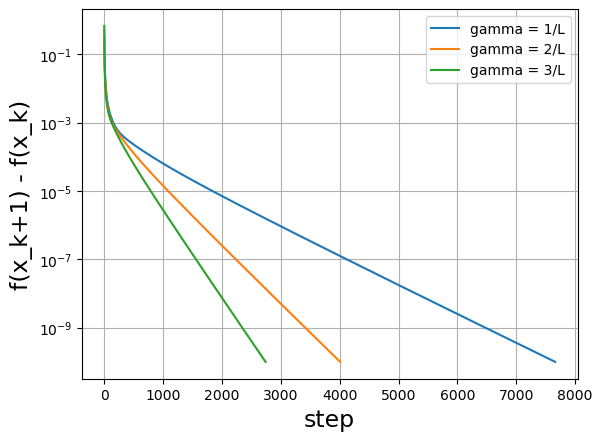

In [43]:
x_axis = [list(range(len(history_1))), list(range(len(history_2))), list(range(len(history_3)))]
y_axis = [[x[0] for x in history_1], [x[0] for x in history_2], [x[0] for x in history_3]]
labels = ['gamma = 1/L', 'gamma = 2/L', 'gamma = 3/L']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

Видно, что чем больше гамма, тем быстрее сходится алгоритм

__в). $\triangle$ (30 баллов)__  Исследуйте другие техники подбора шага: 

1) Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

3) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2_2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

Сравните все подходы подбора шага между собой. Постройте графики сравнения и сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

__в). (15 баллов)__ Теперь решите задачу оптимизации на обучающей выборке с помощью метода тяжелого шарика и метода Нестерова. Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$.

В данном пункте нужно построить три графика: 1) значения критерия сходимости от номера итерации для метода тяжелого шарика с различными значениями моментума, 2) значения критерия сходимости от номера итерации для ускоренного градиентного метода с различными значениями моментума, 3) значения критерия сходимости от номера итерации для двух методов с наилучшим выбором моментума для каждого, а также градиентного спуска.

Не забывайте делать выводы и комментировать результаты. Например, отразите всегда ли сходимость является монотонной?

In [ ]:
#ваше решение (Code и Markdown)

__HeavyBall__

In [46]:
def tau_3(step):
    return step / (step + 3)

def tau_2(step):
    return step / (step + 2)

def tau_1(step):
    return step / (step + 1)

def tau_mu(step):
    return (np.sqrt(L) - np.sqrt(lamda)) / (np.sqrt(L) + np.sqrt(lamda))

In [74]:
len(x_axis), len(y_axis)

(9, 9)

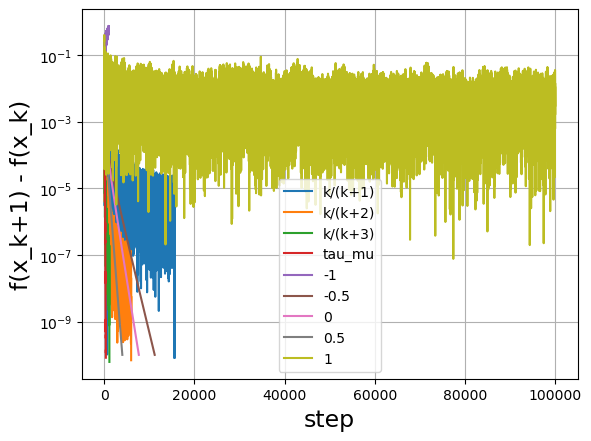

In [75]:
lamda=5e-3
L = heavy_ball.get_L()

histories = []
for tau in [tau_1, tau_2, tau_3, tau_mu, lambda x: -1, lambda x: -0.5, lambda x: 0, lambda x: 0.5, lambda x: 1]:
    heavy_ball = HeavyBall(X_train, y_train, lamda=lamda)
    _, history_ball = heavy_ball.fit(1 / L, tau)
    histories.append(history_ball)

x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['k/(k+1)', 'k/(k+2)', 'k/(k+3)', 'tau_mu', '-1', '-0.5', '0', '0.5', '1']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

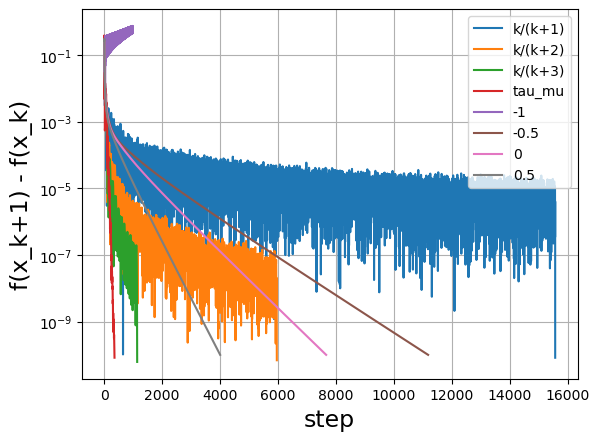

In [76]:
plot(x_axis[:-1], y_axis[:-1], 'step', 'f(x_k+1) - f(x_k)', labels[:-1], scale='log')

Видно, что при постоянных тау данный алгоритм лучше сходится. Однако, при значениях тау -1 алгоритм рассходится а при 1 не сходится. Если сделать тау меняющейся в зависимости от итерации, но приэтом всё равно довольно близкой к 1, то алгоритм по прежнему не сходится

__FastNesterov__

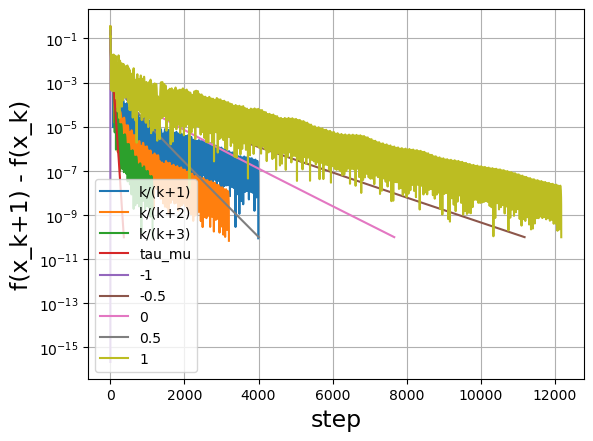

In [77]:
histories = []
for tau in [tau_1, tau_2, tau_3, tau_mu, lambda x: -1, lambda x: -0.5, lambda x: 0, lambda x: 0.5, lambda x: 1]:
    nesterov = FastNesterov(X_train, y_train, lamda=lamda)
    _, history_nest = nesterov.fit(1 / L, tau)
    histories.append(history_nest)

x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['k/(k+1)', 'k/(k+2)', 'k/(k+3)', 'tau_mu', '-1', '-0.5', '0', '0.5', '1']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

In [87]:
nesterov = FastNesterov(X_train, y_train, lamda=lamda)
_, history_nest_1 = nesterov.fit(1 / L, lambda x: -1)

nesterov = FastNesterov(X_train, y_train, lamda=lamda)
_, history_nest_mu = nesterov.fit(1 / L, tau_mu)

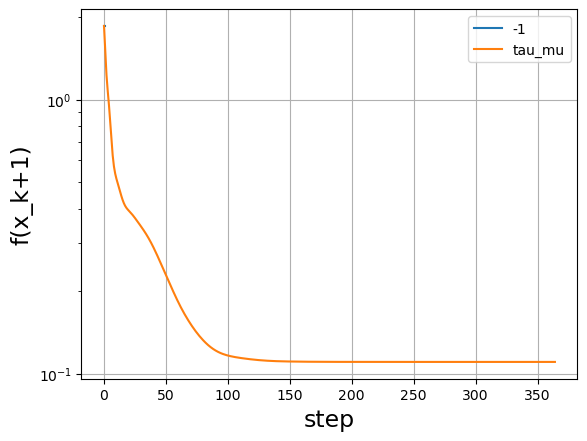

In [95]:
x_axis = [list(range(len(history_nest_1))), list(range(len(history_nest_mu)))]
y_axis = [[x[1] for x in history_nest_1], [x[1] for x in history_nest_mu]]
labels = ['-1', 'tau_mu']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

In [96]:
y_axis[0][-1], y_axis[1][-1]

(1.8604811141925197, 0.11024076397036053)

Здесь можно сделать анологичные выводы

In [97]:
heavy_ball = HeavyBall(X_train, y_train, lamda=lamda)
_, history_ball = heavy_ball.fit(1 / L, tau_mu)

nesterov = FastNesterov(X_train, y_train, lamda=lamda)
_, history_nest = nesterov.fit(1 / L, tau_mu)

gd = HeavyBall(X_train, y_train, lamda=lamda)
_, history_gd = gd.fit(1 / L, tau_zero)

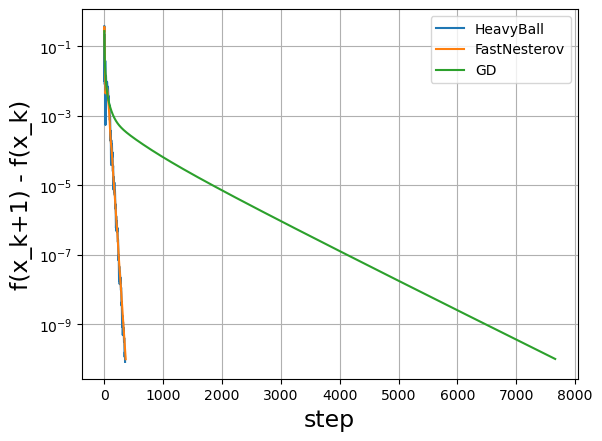

In [99]:
x_axis, y_axis = [], []
for history in [history_ball, history_nest, history_gd]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['HeavyBall', 'FastNesterov', 'GD']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

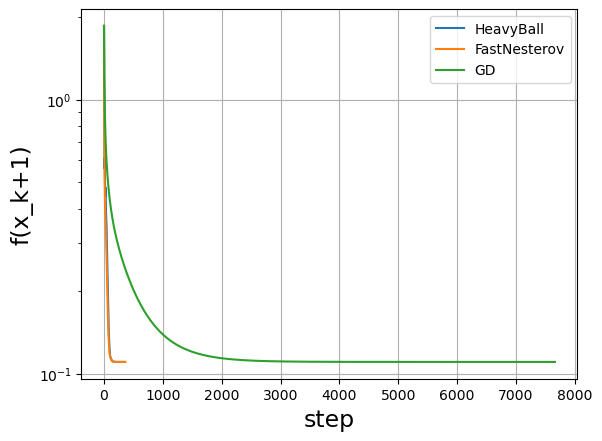

In [100]:
x_axis, y_axis = [], []
for history in [history_ball, history_nest, history_gd]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['HeavyBall', 'FastNesterov', 'GD']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

Видно, что быстрый нестеров и тяжелый шарик сошлись практически одинаково и намного быстрее обычного градиентного спуска

__Задача 3. (всего 65 баллов)__ Теперь поговорим про метод Ньютона и квазиньютоновские методы.

__а). (20 баллов)__ Для задачи регресии реализуйте классический метод Ньютона и запустите его. Сходится ли он? Если нет, то попробуйте перед использованием метода Ньютона сначала запускать метод градиентного спуска на несколько итераций. Варьируйте количество шагов градиентного спуска. Постройте график значения критерия сходимости от номера итерации для комбинации градиентного спуска и метода Ньютона с различным числом шагов градиентного спуска. Сделайте вывод. 

In [ ]:
#ваше решение (Code и Markdown)

In [73]:
class Newton(LogisticRegression):
    def fit(self, gamma_k, K=10**5, eps=1e-10, mode='f(x_k+1) - f(x_k)', gd_steps=0, X_test=None, y_test=None):
        start = time.time()
        heavy_ball = HeavyBall(self.X_train, self.y_train, lamda=self.lamda)
        lr = gamma_k if gamma_k < 1 else 1/heavy_ball.get_L()
        weigth_ball, history_ball = heavy_ball.fit(lr, tau_zero, K=gd_steps)
        self.weigth = weigth_ball
        history = history_ball
        
        for i in range(K):
            weigth_new = self.weigth - gamma_k*np.linalg.inv(self.get_hessian()) @ self.get_grad()
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

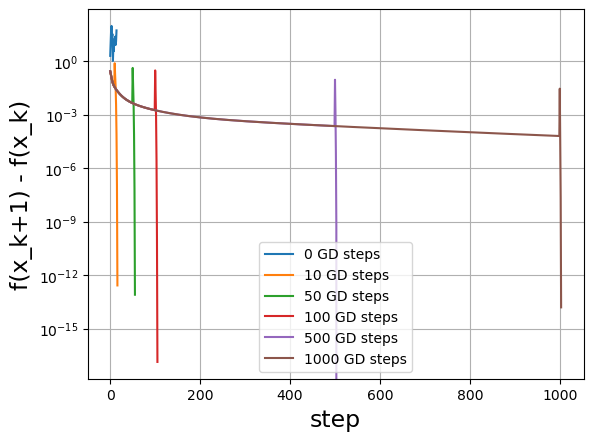

In [165]:
histories = []
for gd_step in [0, 10, 50, 100, 500, 1000]:
    newton = Newton(X_train, y_train, lamda=5e-3)
    _, history_newton = newton.fit(1, K=10**3, gd_steps=gd_step)
    histories.append(history_newton)

x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['0 GD steps', '10 GD steps', '50 GD steps', '100 GD steps', '500 GD steps', '1000 GD steps']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

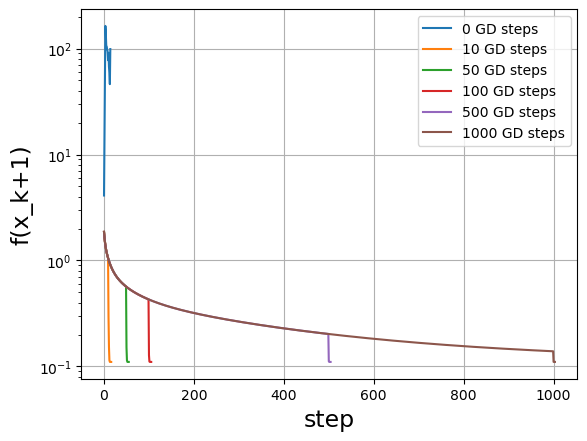

In [166]:
x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['0 GD steps', '10 GD steps', '50 GD steps', '100 GD steps', '500 GD steps', '1000 GD steps']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

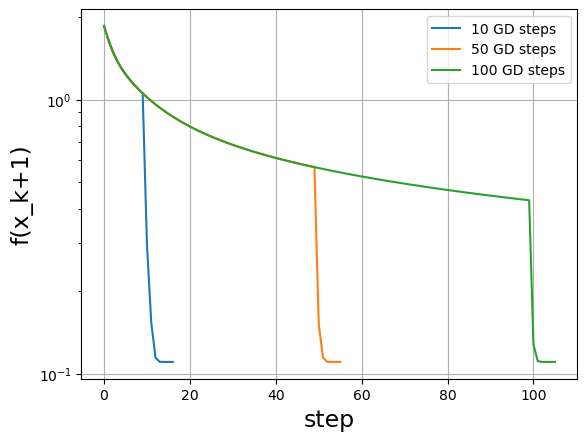

In [167]:
x_axis, y_axis = [], []
for history in histories[1:-2]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['10 GD steps', '50 GD steps', '100 GD steps']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

Видно, что без начального приближения градиентным спуском, метод Ньютона расходится. Зато для его сходимости необходимо буквально несколько шагов GD и тогда Ньтотон сходится буквально за 10 итерций

GD + Newton with $\gamma_k = \frac{1}{L}$

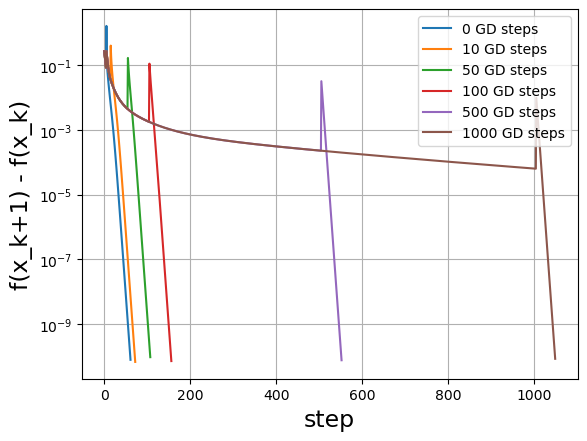

In [118]:
histories = []
for gd_step in [0, 10, 50, 100, 500, 1000]:
    newton = Newton(X_train, y_train, lamda=5e-3)
    _, history_newton = newton.fit(1 / newton.get_L(), K=10**3)

    histories.append(history_newton)

x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[0] for x in history])
labels = ['0 GD steps', '10 GD steps', '50 GD steps', '100 GD steps', '500 GD steps', '1000 GD steps']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

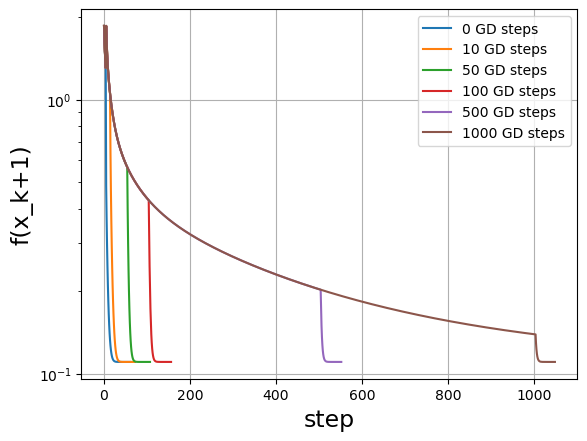

In [119]:
x_axis, y_axis = [], []
for history in histories:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['0 GD steps', '10 GD steps', '50 GD steps', '100 GD steps', '500 GD steps', '1000 GD steps']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

Видно, что если добавить гамму в шаг Ньютоновского метода, то он начинает сходится даже без начального приближения

__б). (15 + 30 баллов)__ Для данной задачи реализуйте квазиньютоновский метод BFGS ($\triangle$ можно реализовать более продвинутую версию L-BFGS, посмотрев оригинальную [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf) или лучше параграф 9.1 [книги](https://www.ime.unicamp.br/~pulino/MT404/TextosOnline/NocedalJ.pdf)). За реализацию L-BFGS и объяснение, как это сделать правильно и вычислительно эффективно, можно получить еще __30 баллов__. Используйте метод(ы) для решения задачи регресии. Добавьте его(их) на график из предыдущего пункта. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [66]:
class BFGS(LogisticRegression):
    def get_alpha(self, p, gradient):
        alpha = 1
        c1 = 1e-4 
        c2 = 0.9 
        loss_curr = self.loss(self.weigth)
        weigth_new = self.weigth + alpha*p
        gradient_new = self.get_grad(weigth_new)
        while self.loss(weigth_new) >= loss_curr + c1*alpha*(gradient*p).sum() or (gradient_new*p).sum() <= c2*(gradient*p).sum():
            alpha *= 0.5
            weigth_new = self.weigth + alpha*p
            gradient_new = self.get_grad(weigth_new)
        return alpha
    
    def fit(self, gamma_k, K=10**5, eps=1e-10, mode='f(x_k+1) - f(x_k)', gd_steps=0, X_test=None, y_test=None):
        history = []
        start = time.time()
        
        H = np.linalg.inv(self.get_hessian())
        for i in range(K):
            gradient = self.get_grad()
            p = -1*H @ gradient
            alpha = self.get_alpha(p, gradient)
            
            weigth_new = self.weigth + alpha*p
            s = weigth_new - self.weigth
            y = self.get_grad(weigth_new) - gradient
            koef = 1 / (y*s + 1e-8).sum()
            matrix = np.eye(len(s)) - koef*s*y[:, None]
            H = matrix @ H @ matrix.T + koef*s*s[:, None]
            
            crit = calc_mode(self.weigth, weigth_new, self.loss, mode)
            history.append([crit, self.loss(weigth_new), time.time() - start, 
                            self.get_accuracy_score(X_test, y_test)])
            self.weigth = weigth_new
            
            if crit < eps:
                break
        return self.weigth, history

In [138]:
bfgs = BFGS(X_train, y_train, lamda=5e-3)
_, history_bfgs = bfgs.fit(1, K=10**3)

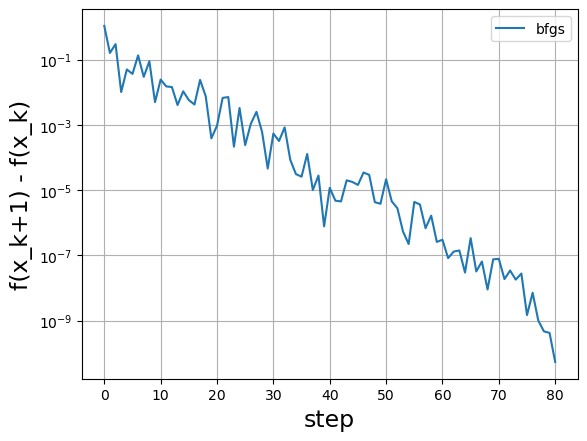

In [139]:
x_axis = [list(range(len(history_bfgs)))]
y_axis = [[x[0] for x in history_bfgs]]
labels = ['bfgs']
plot(x_axis, y_axis, 'step', 'f(x_k+1) - f(x_k)', labels, scale='log')

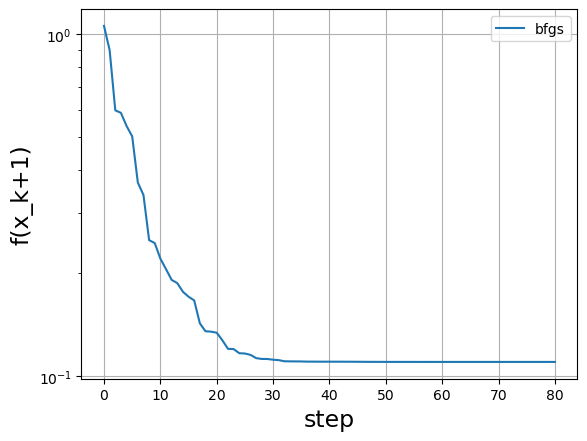

In [140]:
x_axis = [list(range(len(history_bfgs)))]
y_axis = [[x[1] for x in history_bfgs]]
labels = ['bfgs']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

In [171]:
histories = []
for gd_step in [10, 50, 100]:
    newton = Newton(X_train, y_train, lamda=5e-3)
    _, history_newton = newton.fit(1, K=10**3)
    histories.append(history_newton)

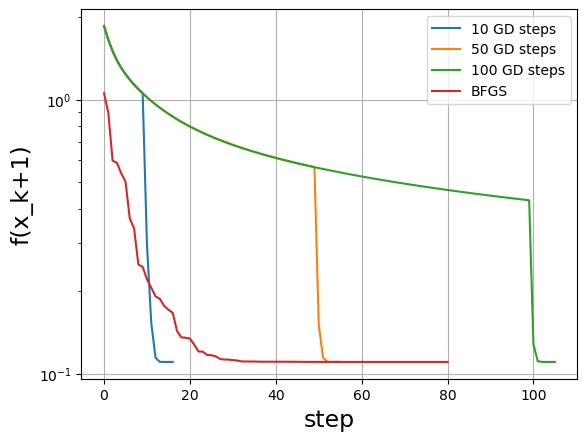

In [173]:
x_axis, y_axis = [], []
for history in histories + [history_bfgs]:
    x_axis.append(list(range(len(history))))
    y_axis.append([x[1] for x in history])
labels = ['10 GD steps', '50 GD steps', '100 GD steps', 'BFGS']
plot(x_axis, y_axis, 'step', 'f(x_k+1)', labels, scale='log')

Видно, что методу BFGS требуется больше итераций, чем Ньютону. Однако он требует постоянного подсчета гессиана и разогревочных шагов с помощью GD  для полной сходимости, как метод Ньютона

__Задача 4. (20 баллов)__ Осталось объеденить результаты полученные в Задачах 1-3. Для этого вспомним, что исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке $X_{test}$. Сравните с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели. Сравните метод градиентного спуска, метод тяжелого шарика, ускоренный градиентный метод, метод Ньютона, BFGS(L-BFGS). Постройте два графика: значение критерия сходимости от времени работы и точность предсказания от времени работы. Сделайте вывод.

In [ ]:
#ваше решение (Code и Markdown)

In [69]:
gd = HeavyBall(X_train, y_train, lamda=lamda)
_, history_gd = gd.fit(1 / L, tau_zero, X_test=X_test, y_test=y_test)

In [70]:
heavy_ball = HeavyBall(X_train, y_train, lamda=lamda)
_, history_ball = heavy_ball.fit(1 / L, tau_mu, X_test=X_test, y_test=y_test)

In [71]:
nesterov = FastNesterov(X_train, y_train, lamda=lamda)
_, history_nest = nesterov.fit(1 / L, tau_mu, X_test=X_test, y_test=y_test)

In [74]:
newton = Newton(X_train, y_train, lamda=5e-3)
_, history_newton = newton.fit(1, K=10**3, gd_steps=10, X_test=X_test, y_test=y_test)

In [75]:
bfgs = BFGS(X_train, y_train, lamda=5e-3)
_, history_bfgs = bfgs.fit(1, K=10**3, X_test=X_test, y_test=y_test)

/Users/dmit-vuk/anaconda3/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/dmit-vuk/anaconda3/lib/python3.11/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


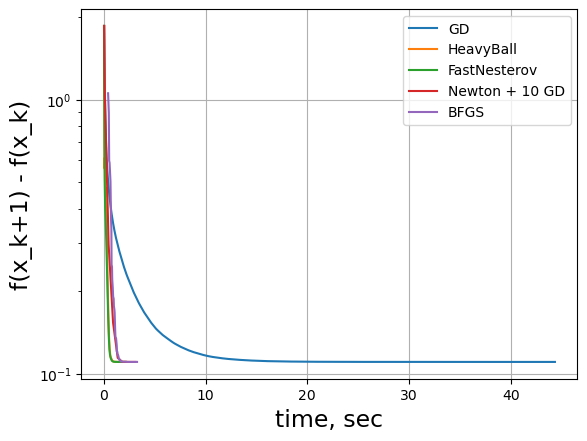

In [79]:
x_axis, y_axis = [], []
for history in [history_gd, history_ball, history_nest, history_newton, history_bfgs]:
    x_axis.append([x[2] for x in history])
    y_axis.append([x[1] for x in history])
labels = ['GD', 'HeavyBall', 'FastNesterov', 'Newton + 10 GD', 'BFGS']
plot(x_axis, y_axis, 'time, sec', 'f(x_k+1) - f(x_k)', labels, scale='log')

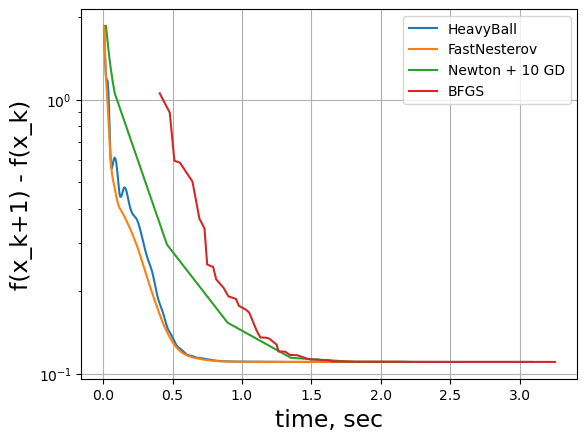

In [81]:
x_axis, y_axis = [], []
for history in [history_ball, history_nest, history_newton, history_bfgs]:
    x_axis.append([x[2] for x in history])
    y_axis.append([x[1] for x in history])
labels = ['HeavyBall', 'FastNesterov', 'Newton + 10 GD', 'BFGS']
plot(x_axis, y_axis, 'time, sec', 'f(x_k+1) - f(x_k)', labels, scale='log')

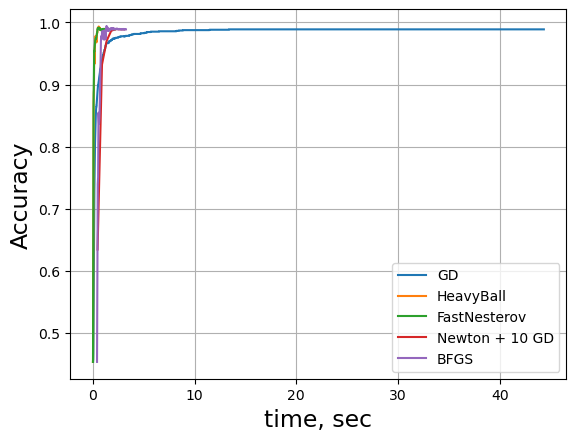

In [83]:
x_axis, y_axis = [], []
for history in [history_gd, history_ball, history_nest, history_newton, history_bfgs]:
    x_axis.append([x[2] for x in history])
    y_axis.append([x[3] for x in history])
labels = ['GD', 'HeavyBall', 'FastNesterov', 'Newton + 10 GD', 'BFGS']
plot(x_axis, y_axis, 'time, sec', 'Accuracy', labels)#, scale='log')

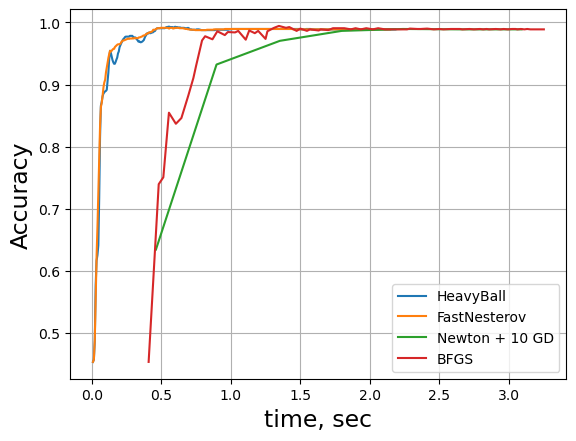

In [84]:
x_axis, y_axis = [], []
for history in [history_ball, history_nest, history_newton, history_bfgs]:
    x_axis.append([x[2] for x in history])
    y_axis.append([x[3] for x in history])
labels = ['HeavyBall', 'FastNesterov', 'Newton + 10 GD', 'BFGS']
plot(x_axis, y_axis, 'time, sec', 'Accuracy', labels)#, scale='log')

Видно, что обчный градиентный спуск работает и сходится до определённого качества дольше всего. Ньютоновский метод сходится быстрее чем bfgs, однако второй выходит на плато по качеству раньше. И лучше всего работает метод тяжёлого шарика и быстрый Нестеров. Они быстрее сходятся и раньше получают определённое качество. 